In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s6e1/sample_submission.csv
/kaggle/input/playground-series-s6e1/train.csv
/kaggle/input/playground-series-s6e1/test.csv


In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv')
test  = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv')

In [4]:
import pandas as pd
import numpy as np

train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv')
test  = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv')

train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [6]:
train.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [7]:
# Target column
y = train['exam_score']

# Features (everything except target)
X = train.drop('exam_score', axis=1)

X.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy


In [8]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)
test_encoded = pd.get_dummies(test)

# Make sure train & test have same columns
X_encoded, test_encoded = X_encoded.align(
    test_encoded, join='left', axis=1, fill_value=0
)

X_encoded.shape, test_encoded.shape

((630000, 31), (270000, 31))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_val.shape

((504000, 31), (126000, 31))

In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [11]:
from sklearn.metrics import root_mean_squared_error

val_predictions = model.predict(X_val)

rmse = root_mean_squared_error(y_val, val_predictions)
rmse

9.040862399117835

In [ ]:
# Train model on FULL training data
model.fit(X_encoded, y)

In [ ]:
# Predict on test dataset
test_predictions = model.predict(test_encoded)

test_predictions[:10]

In [ ]:
# Load sample submission
submission = pd.read_csv(
    '/kaggle/input/playground-series-s6e1/sample_submission.csv'
)

# Fill predictions
submission['exam_score'] = test_predictions

# Save file
submission.to_csv('submission.csv', index=False)

submission.head()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features = [
    'study_hours',
    'attendance_percentage',
    'sleep_hours'
]

categorical_features = [
    'gender',
    'study_method',
    'exam_difficulty'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

preprocessor

In [ ]:
import pandas as pd

# Reload training data
train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv')

train.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.histplot(
    train['exam_score'],
    bins=30,
    kde=True,
    color='steelblue'
)

plt.title("Frequency Distribution of Student Exam Scores with KDE")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_features = [
    'age',
    'study_hours',
    'class_attendance',
    'sleep_hours',
    'exam_score'
]

# Compute correlation matrix
corr_matrix = train[numerical_features].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Pearson Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=train,
    x='study_hours',
    y='exam_score',
    hue='exam_difficulty',
    alpha=0.6
)

plt.title("Study Hours vs Exam Score Stratified by Exam Difficulty")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")

plt.legend(title="Exam Difficulty")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))

sns.boxplot(
    data=train,
    x='study_method',
    y='exam_score'
)

plt.title("Distribution of Exam Scores by Study Method")
plt.xlabel("Study Method")
plt.ylabel("Exam Score")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Reload dataset
train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv')

# Separate features and target
X = train.drop('exam_score', axis=1)
y = train['exam_score']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

X_encoded.shape, y.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

train_sizes, train_scores, val_scores = learning_curve(
    rf_model,
    X_encoded,
    y,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

# Convert from negative RMSE to RMSE
train_rmse = -np.mean(train_scores, axis=1)
val_rmse = -np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse, 'o-', label='Validation RMSE')

plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Model Learning Curve Showing Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

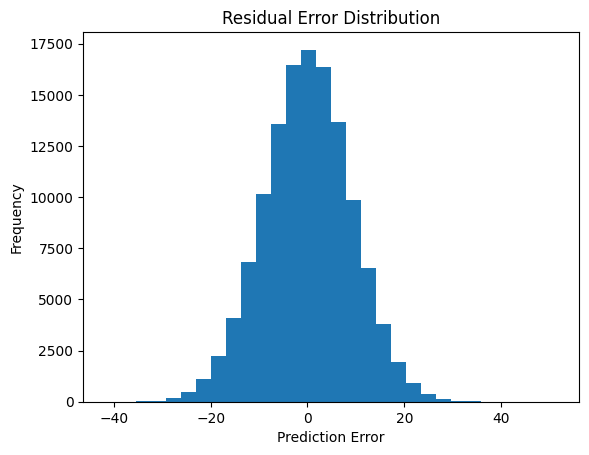

In [23]:
residuals = y_val - val_predictions

plt.hist(residuals, bins=30)
plt.title("Residual Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [ ]:
plt.scatter(y_val, val_predictions, alpha=0.3)
plt.plot([0, 100], [0, 100], 'r--')  # perfect prediction line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()